In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split, train_test_split
from tensorflow.keras.utils import to_categorical

Classification with CNN
任务要求：
1. 每类数据读取10张图像（带有标签）进行
展示
2. 构建CNN（例如Alex net）作为10-分类模型
3. 每类数据按照6:3:1方式划分训练集、验证
集、测试集对模型进行训练，绘制训练过程
中损失函数和预测acc曲线（在同一幅图中）
4. 从每类数据的测试集中随机抽取10张图片
进行预测，输出该图像的标签以及预测概率
分布的柱状图
5. 最后结果以ipynb文件提交

In [2]:
# 加载数据集
num_classes = 10
data = []
labels = []
img_labels = ['ambulance', 'apple', 'bear', 'bicycle', 'bird', 'bus', 'cat', 'foot', 'owl', 'pig']
for idx, i in enumerate(img_labels):
    file_name = f"./quick_draw_data/{i}/{i}.npy"
    class_data = np.load(file_name)
    class_labels = np.full(class_data.shape[0], idx)
    data.append(class_data)
    labels.append(class_labels)
# print(labels)

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\envs\\q-FFL\\lib\\site-packages\\matplotlib\\pyplot.py'>

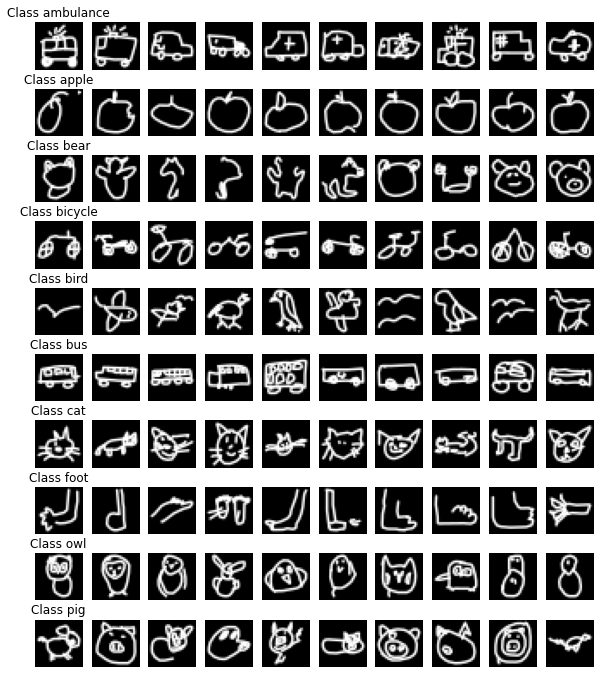

In [3]:
# 取出每类数据的前10张进行展示
plt.figure(figsize=(10, 12))
for i in range(num_classes):
    for j in range(10):
        img = Image.fromarray(data[i][j, :].reshape(28, 28))
        plt.subplot(num_classes, 10, i * 10 + j + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(f'Class {img_labels[i]}')
plt

In [4]:
# 数据集划分
# 合并数据和标签，并进行训练集、验证集、测试集划分
data = np.concatenate(data)
labels = np.concatenate(labels)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# 数据预处理
x_train = x_train.reshape((-1, 28, 28, 1))
x_val = x_val.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# 构建CNN模型
model = Sequential()
model.add(Conv2D(96, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# 模型训练
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
938/938 [==============================] - 14s 10ms/step - loss: 0.6663 - accuracy: 0.7718 - val_loss: 0.4525 - val_accuracy: 0.8522
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3745 - accuracy: 0.8745 - val_loss: 0.3882 - val_accuracy: 0.8712
Epoch 3/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3117 - accuracy: 0.8944 - val_loss: 0.3923 - val_accuracy: 0.8726
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.2639 - accuracy: 0.9108 - val_loss: 0.3486 - val_accuracy: 0.8874
Epoch 5/10
938/938 [==============================] - 9s 9ms/step - loss: 0.2252 - accuracy: 0.9226 - val_loss: 0.3547 - val_accuracy: 0.8907
Epoch 6/10
938/938 [==============================] - 9s 9ms/step - loss: 0.1935 - accuracy: 0.9330 - val_loss: 0.4022 - val_accuracy: 0.8826
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.1621 - accuracy: 0.9434 - val_loss: 0.4121 - val_accuracy: 0.8844
Epo

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\envs\\q-FFL\\lib\\site-packages\\matplotlib\\pyplot.py'>

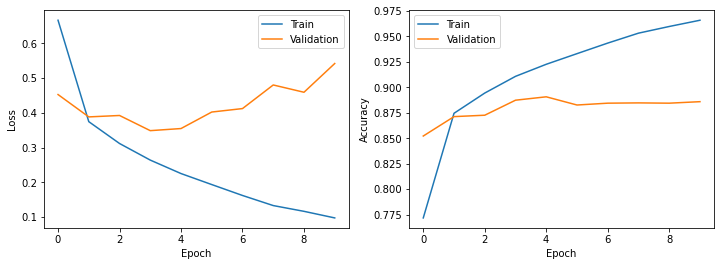

In [7]:
# 绘制损失函数和预测准确率曲线
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt

In [8]:

# 随机选择10张图像进行预测
random_indices = random.sample(range(x_test.shape[0]), 10)
images = x_test[random_indices]
true_labels = y_test[random_indices]

In [9]:
# 预测图像标签和概率分布
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)
class_probabilities = np.max(predictions, axis=1)

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\envs\\q-FFL\\lib\\site-packages\\matplotlib\\pyplot.py'>

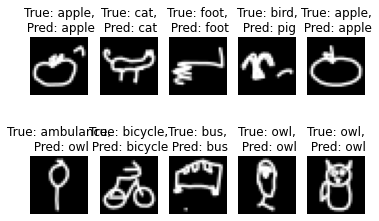

In [10]:
# 输出预测结果
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {img_labels[true_labels[i]]},\n Pred: {img_labels[predicted_labels[i]]}')
    plt.axis('off')
    # plt.tight_layout()
plt

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\envs\\q-FFL\\lib\\site-packages\\matplotlib\\pyplot.py'>

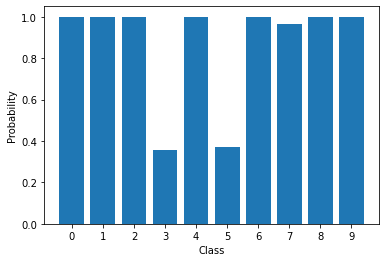

In [11]:
# 绘制预测概率分布的柱状图
plt.bar(range(10), class_probabilities)
plt.xticks(range(10))
plt.xlabel('Class')
plt.ylabel('Probability')
plt

Classification with Bi-LSTM
实验任务要求：
1. 每类数据读取10个序列，并绘制其图像（带有标签）进行展示
2. 构建一个双向LSTM作为图像点序列数据的编码器，基于此编码器
+Softmax构建10-分类模型。（注意LSTM处理序列的长度限定为256，
长度不够的图像点序列通过补0补全，长度超过256的序列进行截断）
3. 每类数据按照6:3:1方式划分训练集、验证集、测试集对模型进行
训练，绘制训练过程中损失函数和预测acc曲线（在同一幅图中）
4. 从每类数据的测试集中随机抽取10个图像序列进行预测，输出该
图像的标签以及预测概率分布的柱状图
5. 结果以.ipynb格式提交

In [ ]:
# 数据集划分
# 合并数据和标签，并进行训练集、验证集、测试集划分
data = np.concatenate(data)
labels = np.concatenate(labels)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# 数据预处理
x_train = x_train.reshape((-1, 28, 28, 1))
x_val = x_val.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [94]:
# 1. 读取并展示图像序列
def read_and_display_sequences(data, img_labels, num_sequences=10):
    plt.figure(figsize=(10, 15))

    for i in range(10):
        for j in range(1,num_sequences+1):
            sequence = data[i][j][:256]  # 截断或补全序列长度为256
            x = np.cumsum(sequence[:,0])
            y = np.cumsum(sequence[:,1])
            plt.subplot(10, 10, i * 10 + j)
            plt.plot(x, y)
            plt.axis('off')
            if j == 1:
                plt.title(f'Class {img_labels[i]}')
    plt

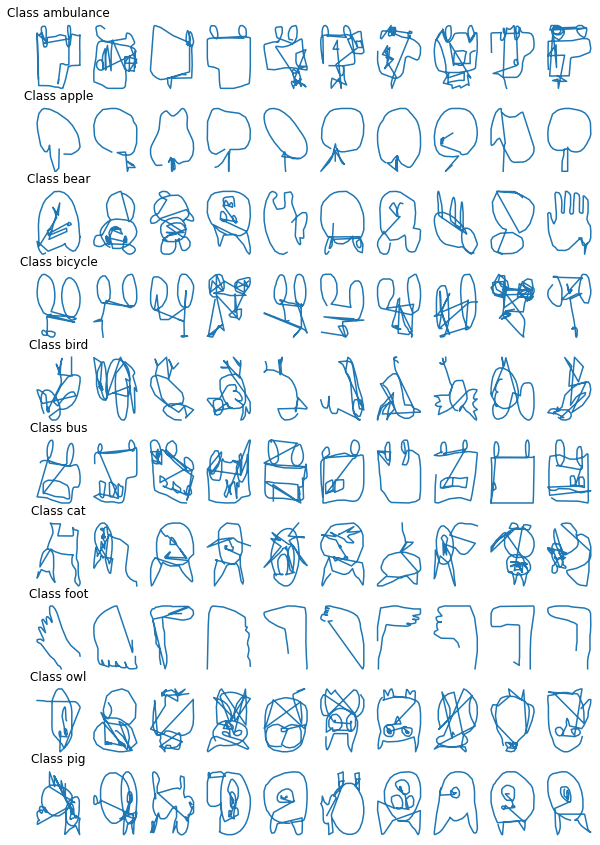

In [95]:
# 调用函数读取并展示图像序列
datas = []
labels = []
ldata = []
llabel = []
lens = 0
img_labels = ['ambulance', 'apple', 'bear', 'bicycle', 'bird', 'bus', 'cat', 'foot', 'owl', 'pig']
for idx, i in enumerate(img_labels):
    data_path = f"./sketch_datas/{i}.npy"
    datas.append(np.load(data_path)[:11])  # 读取npy文件
    labels.append(np.full(datas[idx].shape[0], idx))
    lens += datas[idx].shape[0]
# print(data[0][1][:256])
read_and_display_sequences(datas, img_labels, num_sequences=10)

for i in range(10):
    for j in range(len(datas[i])):
        ldata.append(datas[i][j])
        llabel.append((labels[i][j]))
# print(len(ldata))

In [25]:
# 2. 构建双向LSTM编码器和分类模型
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Bidirectional(LSTM(128), input_shape=input_shape))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [26]:
# 定义模型输入形状和类别数量
input_shape = (256, 5)
num_classes = 10

# 构建模型
model = build_model(input_shape, num_classes)
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               137216    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 139,786
Trainable params: 139,786
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 3. 划分数据集并训练模型
def prepare_sequences(data, maxlen=256):
    X = np.zeros((len(data), maxlen, 5))
    for i, sequence in enumerate(data):
        if len(sequence) > maxlen:
            sequence = sequence[:maxlen]
        X[i, :len(sequence)] = sequence
    return X

In [28]:
# 划分训练集、验证集和测试集
train_data, test_data, train_labels, test_labels = train_test_split(ldata, llabel, test_size=0.1, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.3, random_state=42)

In [29]:
# 准备数据并进行补全
train_X = prepare_sequences(train_data)
val_X = prepare_sequences(val_data)
test_X = prepare_sequences(test_data)

train_y = to_categorical(train_labels)
val_y = to_categorical(val_labels)
test_y = to_categorical(test_labels)

In [30]:
# 训练模型
history = model.fit(train_X, train_y, validation_data=(val_X, val_y), batch_size=32, epochs=10)

Epoch 1/10
13782/13782 [==============================] - 431s 31ms/step - loss: 0.2288 - accuracy: 0.9196 - val_loss: 0.0402 - val_accuracy: 0.9875
Epoch 2/10
13782/13782 [==============================] - 603s 44ms/step - loss: 0.1513 - accuracy: 0.9477 - val_loss: 0.0663 - val_accuracy: 0.9781
Epoch 3/10
13782/13782 [==============================] - 689s 50ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0327 - val_accuracy: 0.9897
Epoch 4/10
13782/13782 [==============================] - 1745s 127ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0326 - val_accuracy: 0.9908
Epoch 5/10
13782/13782 [==============================] - 438s 32ms/step - loss: 0.2013 - accuracy: 0.9296 - val_loss: 0.0816 - val_accuracy: 0.9738
Epoch 6/10
13782/13782 [==============================] - 429s 31ms/step - loss: 0.0546 - accuracy: 0.9825 - val_loss: 0.0266 - val_accuracy: 0.9914
Epoch 7/10
13782/13782 [==============================] - 455s 33ms/step - loss: 0.1214 - accuracy: 0.96

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\envs\\q-FFL\\lib\\site-packages\\matplotlib\\pyplot.py'>

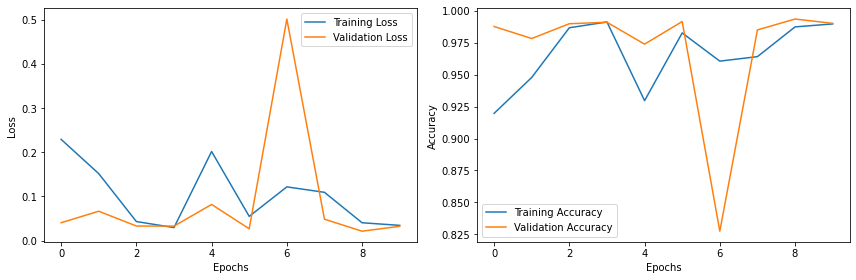

In [31]:
# 绘制损失函数和准确率曲线
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt

In [32]:
# 4. 进行预测
def predict_samples(model, test_samples, labels):
    pred_prob = model.predict(test_samples)
    pred_labels = np.argmax(pred_prob, axis=1)
    for i in range(len(test_samples)):
        print(f"Sample {i+1}:")
        print("True Label:", labels[i])
        print("Predicted Label:", pred_labels[i])
        print("Prediction Probabilities:")
        for j in range(10):
            print(f"Class {j}: {pred_prob[i][j]:.4f}")
        print()
    return pred_prob


In [33]:
# 从测试集中随机抽取10个样本进行预测
random_indices = np.random.choice(len(test_X), size=10, replace=False)
random_samples = test_X[random_indices]
random_labels = np.array(test_labels)[random_indices]

pred_prob = predict_samples(model, random_samples, random_labels)

Sample 1:
True Label: 9
Predicted Label: 9
Prediction Probabilities:
Class 0: 0.0000
Class 1: 0.0001
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0000
Class 6: 0.0000
Class 7: 0.0000
Class 8: 0.0000
Class 9: 0.9998

Sample 2:
True Label: 2
Predicted Label: 2
Prediction Probabilities:
Class 0: 0.0015
Class 1: 0.0000
Class 2: 0.9974
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0000
Class 6: 0.0010
Class 7: 0.0000
Class 8: 0.0001
Class 9: 0.0000

Sample 3:
True Label: 7
Predicted Label: 7
Prediction Probabilities:
Class 0: 0.0000
Class 1: 0.0004
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0000
Class 6: 0.0000
Class 7: 0.9996
Class 8: 0.0000
Class 9: 0.0000

Sample 4:
True Label: 6
Predicted Label: 6
Prediction Probabilities:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0000
Class 6: 0.9999
Class 7: 0.0000
Class 8: 0.0000
Class 9: 0.0000

Sample 5:
True Label: 8
Predicted Label: 8
Prediction Probabilities:
Class 0: 0.

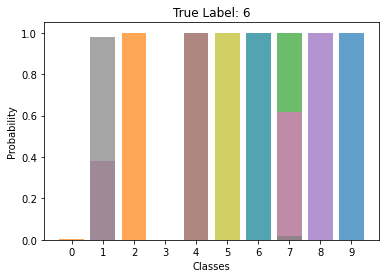

In [34]:
# 绘制预测概率分布的柱状图
def plot_prediction_bar(pred_prob, true_label):
    classes = np.arange(10)
    plt.bar(classes, pred_prob, alpha=0.7)
    plt.xticks(classes)
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.title(f"True Label: {true_label}")
    plt

for i in range(10):
    plot_prediction_bar(pred_prob[i], random_labels[i])